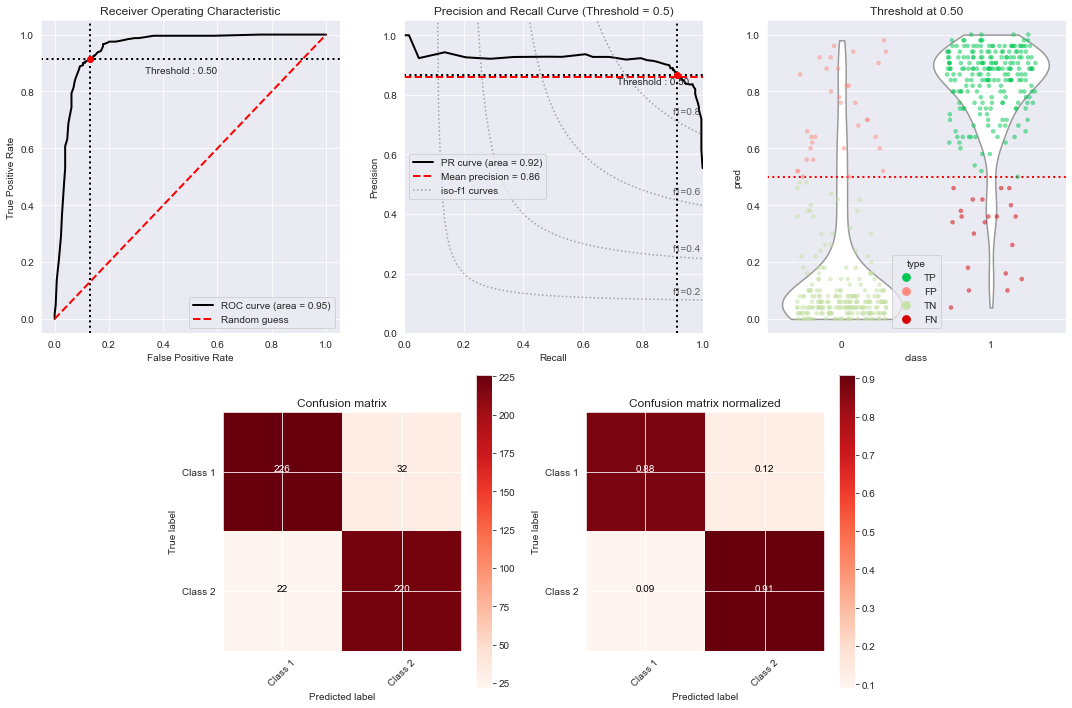

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.91      0.88      0.89       258
     Class 2       0.87      0.91      0.89       242

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



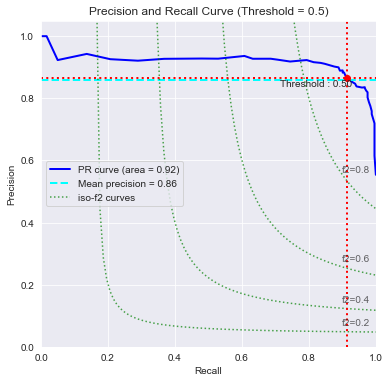

In [2]:
# Package
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from pandas import DataFrame
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)



# Building Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)

# Train our classifier
model = clf.fit(X_train, y_train)

# Predict test set
y_pred = clf.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)

# Save figure
plt.savefig('./example_binary_classification.png')

# Display Figure
plt.show()
plt.close()

# Full report of the classification
bc.print_report()

# Example custom param using dictionnary
param_pr_plot = {
    'c_pr_curve':'blue',
    'c_mean_prec':'cyan',
    'c_thresh_lines':'red',
    'c_f1_iso':'green',
    'beta': 2,
}

plt.figure(figsize=(6,6))
bc.plot_precision_recall_curve(**param_pr_plot)

# Save figure
plt.savefig('./example_binary_class_PRCurve_custom.png')

# Display Figure
plt.show()
plt.close()